
# This code is an alternative analysis using the Sentiment measures from the Guardian News, Google Trends Data and count of articles

@Jorge de Leon

In [1]:
%matplotlib inline

#Set up
import os
os.chdir("..")

import time
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import packages from numpy
from numpy import mean
from numpy import absolute
from numpy import loadtxt


# Ignore warnings from scikit-learn to make this notebook a bit nicer
warnings.simplefilter('ignore')

# Models may be implemented as pipelines as well as other sklearn tools
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.compose import TransformedTargetRegressor

# Used to divide our dataseets into train/test splits
# Data will be randomly shuffled so running this notebook multiple times may lead to different results
from sklearn.model_selection import train_test_split as tts

#Import models for linear regression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet, LinearRegression, Lasso, LassoLars, SGDRegressor


#Import models for classification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

# Visual analysis of model performance
from yellowbrick.features import Rank2D
from yellowbrick.features import RadViz
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.features import FeatureImportances
from yellowbrick.classifier import confusion_matrix
from yellowbrick.classifier import ClassificationReport


# Set the default figure size for matplotlib
plt.rcParams['figure.figsize'] = (9, 6)

# Predictive power from using Events Data sentiment and polarity

## Linear models for predicting the average monthly residual

In [2]:
#import base file 
#Residuals dataset
raw_data = pd.read_csv('constructed\\capstone\\final_dataset.csv')

In [3]:
data = raw_data

In [4]:
data.columns

Index(['ticker', 'year', 'month', 'mthly_ave_resid', 'sec_pos_words',
       'sec_neg_words', 'mthly_filing_count', 'gs_poswords', 'gs_negwords',
       'date', 'goo_trends_value', 'polarity', 'subjectivity',
       'count_word_stock', 'total_words', 'no_articles', 'polarity_biotec',
       'subjectivity_biotec', 'count_word_stock_biotec', 'total_words_biotec',
       'no_articles_biotec', 'polarity_pharma', 'subjectivity_pharma',
       'count_word_stock_pharma', 'total_words_pharma', 'no_articles_pharma'],
      dtype='object')

In [5]:
features = ["mthly_filing_count", "goo_trends_value", "polarity", 
            "no_articles","polarity_biotec","subjectivity_biotec","no_articles_biotec",
            "polarity_pharma","subjectivity_pharma","no_articles_pharma"]
X = data[features]
y = data["mthly_ave_resid"]

In [6]:
## Linear Regression
# prepare the model with input scaling
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', LinearRegression())])
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())
# evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 0.003


In [7]:
## Linear Regression
# prepare the model with input scaling
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', LinearRegression())])
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())
# evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean R2: %.3f' % (s_mean))

Mean R2: 0.031


In [8]:
##SGD Regressor

# prepare the model with input scaling
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', SGDRegressor(loss="huber", epsilon=1e-3))])
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())
# evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 0.016


In [9]:
##SGD Regressor

# prepare the model with input scaling
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', SGDRegressor(loss="huber", epsilon=1e-3))])
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())
# evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean R2: %.3f' % (s_mean))

Mean R2: 14.219


In [10]:
##Lasso Regression

# prepare the model with input scaling
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', Lasso(alpha=0.1))])
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())
# evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 0.003


In [11]:
##Lasso Regression

# prepare the model with input scaling
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', Lasso(alpha=0.1))])
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())
# evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean R2: %.3f' % (s_mean))

Mean R2: 0.011


In [12]:
##Elastic Net

# prepare the model with input scaling
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', ElasticNet(random_state=0))])
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())
# evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 0.003


In [13]:
##Elastic Net

# prepare the model with input scaling
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', ElasticNet(random_state=0))])
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())
# evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean R2: %.3f' % (s_mean))

Mean R2: 0.011


# Alternative making the regression problem a binary classification problem, using 1 standard deviation away from the mean = 1

I will asign the value of 1 to every single residual that is one standard deviation away from the mean. 

In [14]:
data_sd = raw_data

In [15]:
data_sd.columns

Index(['ticker', 'year', 'month', 'mthly_ave_resid', 'sec_pos_words',
       'sec_neg_words', 'mthly_filing_count', 'gs_poswords', 'gs_negwords',
       'date', 'goo_trends_value', 'polarity', 'subjectivity',
       'count_word_stock', 'total_words', 'no_articles', 'polarity_biotec',
       'subjectivity_biotec', 'count_word_stock_biotec', 'total_words_biotec',
       'no_articles_biotec', 'polarity_pharma', 'subjectivity_pharma',
       'count_word_stock_pharma', 'total_words_pharma', 'no_articles_pharma'],
      dtype='object')

## I use 1 std away from the mean as "large movement"

In [16]:
#Generate boundaries for each ticker
group_agg = data_sd.groupby(["ticker"]).agg({"mthly_ave_resid" : ["mean", "std"]})
group_agg = group_agg.reset_index()
group_agg.columns = group_agg.columns.map(''.join)

#Rename columns 
group_agg = group_agg.rename(columns={'mthly_ave_residmean':'resid_mean',
                                      'mthly_ave_residstd':'resid_std'
                                                     })

group_agg['interval_superior'] = group_agg['resid_mean'] + group_agg['resid_std']
group_agg['interval_inferior'] = group_agg['resid_mean'] - group_agg['resid_std']

In [17]:
data_sd['target']= 0

data_sd.loc[(data_sd['mthly_ave_resid'] >= group_agg.iloc[0]['interval_superior']) & (data_sd['ticker'] == 'ALXN'), 'target'] = 1
data_sd.loc[(data_sd['mthly_ave_resid'] <= group_agg.iloc[0]['interval_inferior']) & (data_sd['ticker'] == 'ALXN'), 'target'] = 1

data_sd.loc[(data_sd['mthly_ave_resid'] >= group_agg.iloc[1]['interval_superior']) & (data_sd['ticker'] == 'AMGN'), 'target'] = 1
data_sd.loc[(data_sd['mthly_ave_resid'] <= group_agg.iloc[1]['interval_inferior']) & (data_sd['ticker'] == 'AMGN'), 'target'] = 1

data_sd.loc[(data_sd['mthly_ave_resid'] >= group_agg.iloc[2]['interval_superior']) & (data_sd['ticker'] == 'BIIB'), 'target'] = 1
data_sd.loc[(data_sd['mthly_ave_resid'] <= group_agg.iloc[2]['interval_inferior']) & (data_sd['ticker'] == 'BIIB'), 'target'] = 1

data_sd.loc[(data_sd['mthly_ave_resid'] >= group_agg.iloc[3]['interval_superior']) & (data_sd['ticker'] == 'GILD'), 'target'] = 1
data_sd.loc[(data_sd['mthly_ave_resid'] <= group_agg.iloc[3]['interval_inferior']) & (data_sd['ticker'] == 'GILD'), 'target'] = 1

data_sd.loc[(data_sd['mthly_ave_resid'] >= group_agg.iloc[4]['interval_superior']) & (data_sd['ticker'] == 'INCY'), 'target'] = 1
data_sd.loc[(data_sd['mthly_ave_resid'] <= group_agg.iloc[4]['interval_inferior']) & (data_sd['ticker'] == 'INCY'), 'target'] = 1

data_sd.loc[(data_sd['mthly_ave_resid'] >= group_agg.iloc[5]['interval_superior']) & (data_sd['ticker'] == 'REGN'), 'target'] = 1
data_sd.loc[(data_sd['mthly_ave_resid'] <= group_agg.iloc[5]['interval_inferior']) & (data_sd['ticker'] == 'REGN'), 'target'] = 1

data_sd.loc[(data_sd['mthly_ave_resid'] >= group_agg.iloc[6]['interval_superior']) & (data_sd['ticker'] == 'VRTX'), 'target'] = 1
data_sd.loc[(data_sd['mthly_ave_resid'] <= group_agg.iloc[6]['interval_inferior']) & (data_sd['ticker'] == 'VRTX'), 'target'] = 1


In [18]:
#Create features and target dataframes

features = ["goo_trends_value", "polarity","no_articles","polarity_biotec","subjectivity_biotec",
            "no_articles_biotec","polarity_pharma","subjectivity_pharma","no_articles_pharma"]

X = data_sd[features]
y = data_sd["target"]  

# Correlation

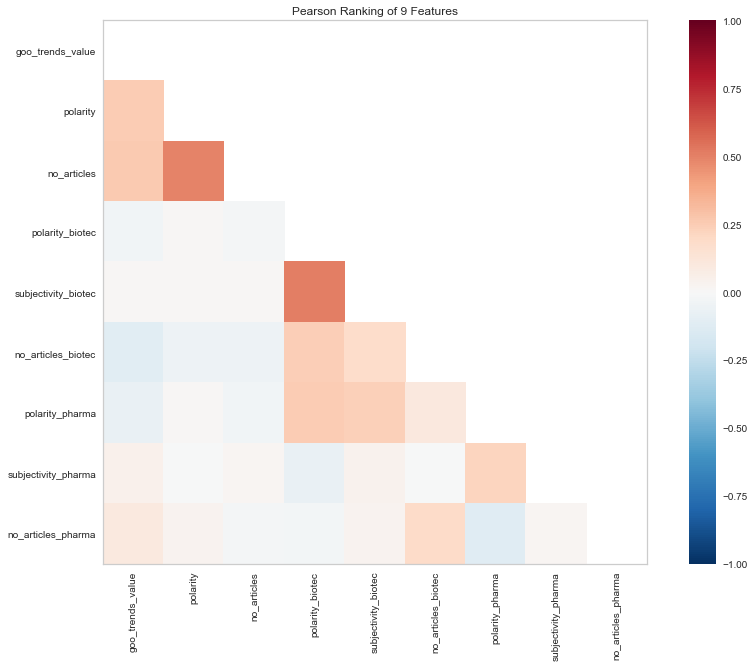

In [19]:
# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson', features=features, size=(1080, 720))

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.show()

# Radviz

RadViz is a multivariate data visualization algorithm that plots each feature dimension uniformly around the circumference of a circle then plots points on the interior of the circle such that the point normalizes its values on the axes from the center to each arc. This mechanism allows as many dimensions as will easily fit on a circle, greatly expanding the dimensionality of the visualization.

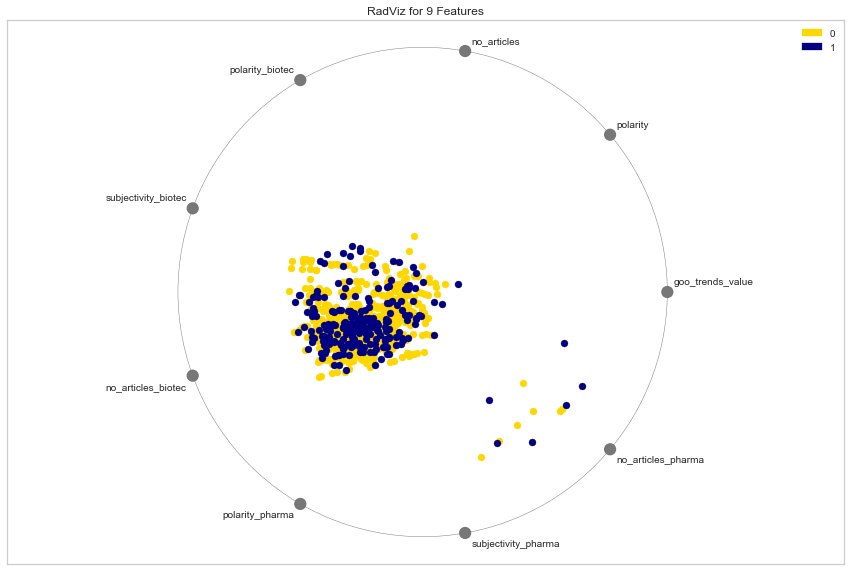

In [20]:
# Specify the target classes
classes = [0, 1]

# Now experiment with changing the colors!
visualizer = RadViz(
    classes=classes, 
    features=features, 
    size=(1080, 720),
    colors=['gold','navy'] # you can also use the `colormap` argument to set color
)

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Draw the data

# Parallel Coordinates¶

Parallel coordinates is multi-dimensional feature visualization technique where the vertical axis is duplicated horizontally for each feature. Instances are displayed as a single line segment drawn from each vertical axes to the location representing their value for that feature. This allows many dimensions to be visualized at once; in fact given infinite horizontal space (e.g. a scrolling window), technically an infinite number of dimensions can be displayed!

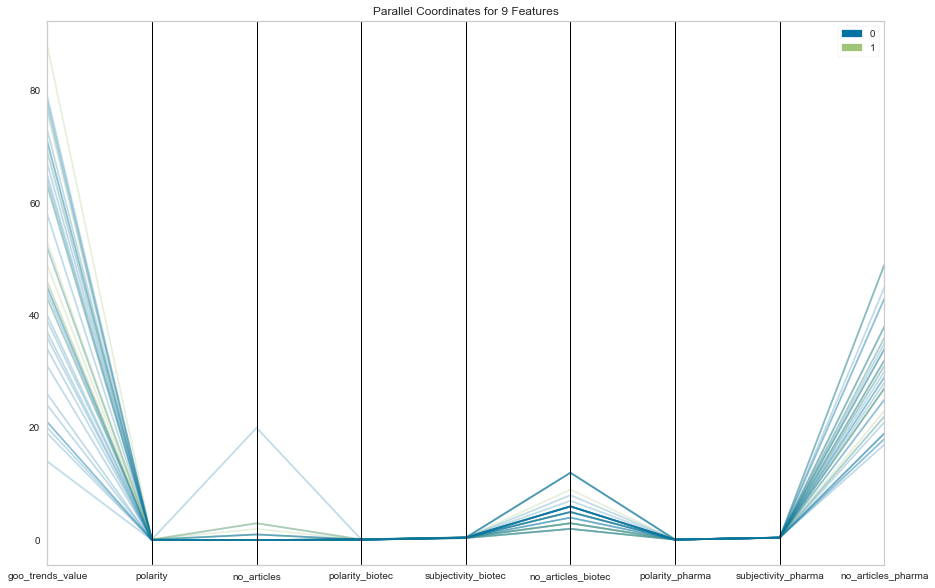

In [21]:
from yellowbrick.features import ParallelCoordinates

# Specify the features of interest and the classes of the target
# Instantiate the visualizer
visualizer = ParallelCoordinates(
    classes=classes, features=features, sample=0.05, 
    shuffle=True, size=(1080, 720)
)

# Fit and transform the data to the visualizer
visualizer.fit(X, y)
visualizer.transform(X)

# Finalize the title and axes then display the visualization
visualizer.show()

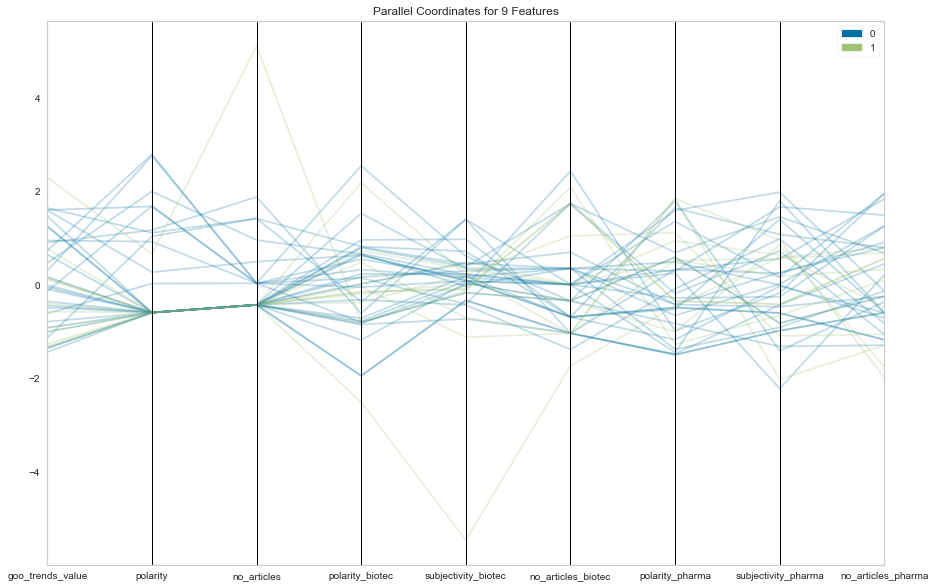

In [22]:
#Using normalizer
# Instantiate the visualizer
visualizer = ParallelCoordinates(
    classes=classes, features=features,
    normalize='standard', # This time we'll specify a normalizer
    sample=0.05, shuffle=True, size=(1080, 720)
)

# Fit the visualizer and display it
visualizer.fit(X, y)
visualizer.transform(X)

visualizer.show()

# Try models

In [23]:
#Create function for scoring the model

def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """ 
    # Instantiate the classification model and visualizer
    model.fit(X, y, **kwargs)  
    
    expected  = y
    predicted = model.predict(X)
    
    # Compute and return F1 (harmonic mean of precision and recall)
    print("{}: {}".format(estimator.__class__.__name__, f1_score(expected, predicted)))

In [24]:
#Try all models

models = [
    SVC(gamma='auto'), NuSVC(gamma='auto'), LinearSVC(), 
    SGDClassifier(max_iter=100, tol=1e-3), KNeighborsClassifier(), 
    LogisticRegression(solver='lbfgs'), LogisticRegressionCV(cv=3), 
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=100), 
    RandomForestClassifier(n_estimators=10)
]

for model in models:
    score_model(X, y, model)

SVC: 0.5668789808917197
NuSVC: 0.7894736842105262
LinearSVC: 0.0
SGDClassifier: 0.0
KNeighborsClassifier: 0.4011976047904192
LogisticRegression: 0.0
LogisticRegressionCV: 0.0
BaggingClassifier: 0.9047619047619048
ExtraTreesClassifier: 0.9748283752860412
RandomForestClassifier: 0.9125295508274232



Preliminary Model Evaluation

Based on the results from the F1 scores above, the ExtraTressClassifier, RandomForestClassifier and the Bagging Classifier are doing a good job at predicting which residual stock prices are above or below one standard deviation of their corresponding mean. 


Visual Model Evaluation¶

Now let's refactor our model evaluation function to use Yellowbrick's ClassificationReport class, a model visualizer that displays the precision, recall, and F1 scores. This visual model analysis tool integrates numerical scores as well color-coded heatmap in order to support easy interpretation and detection, particularly the nuances of Type I and Type II error, which are very relevant (lifesaving, even) to our use case!

Type I error (or a "false positive") is detecting an effect that is not present (e.g. determining a mushroom is poisonous when it is in fact edible).

Type II error (or a "false negative") is failing to detect an effect that is present (e.g. believing a mushroom is edible when it is in fact poisonous).


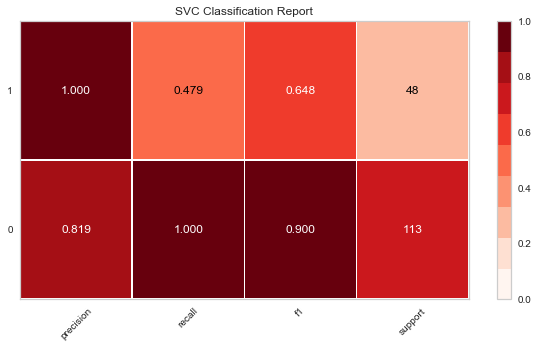

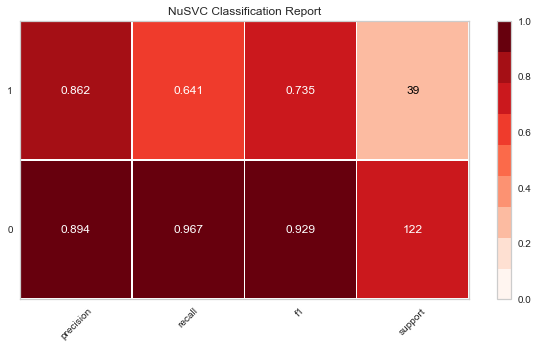

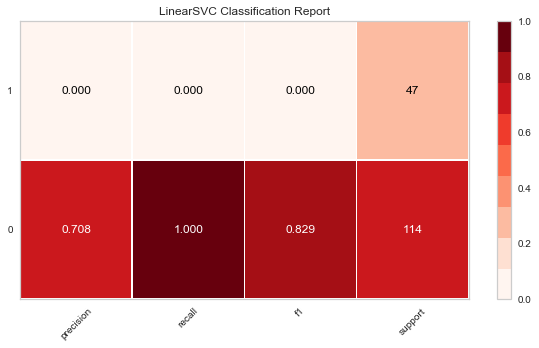

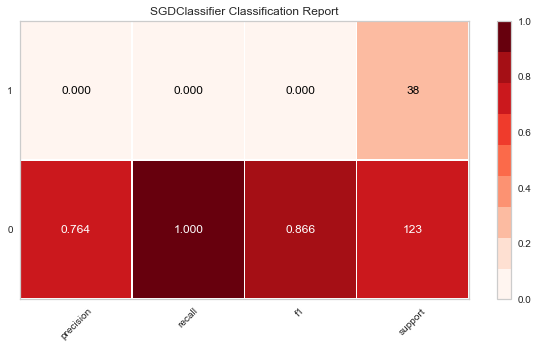

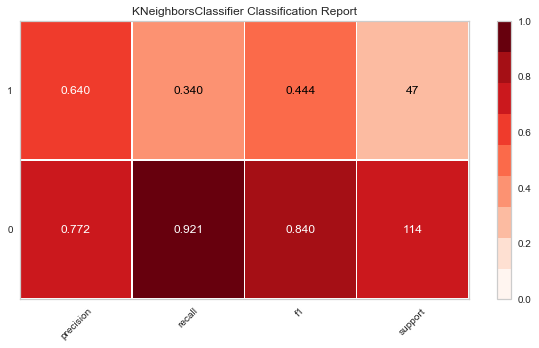

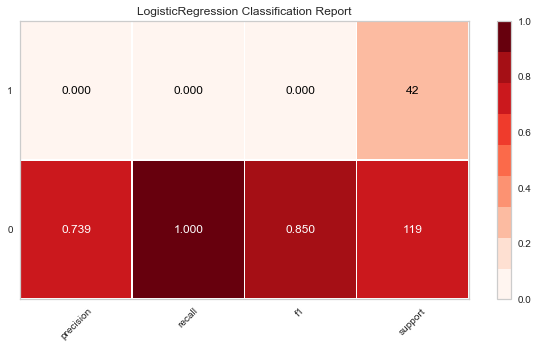

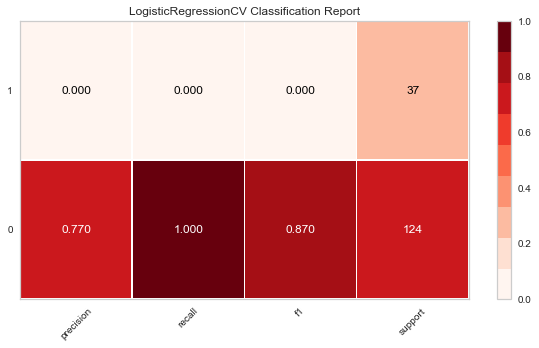

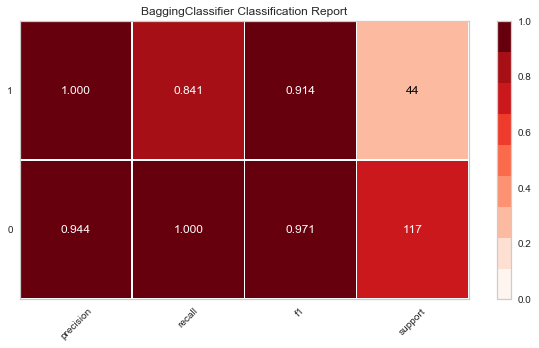

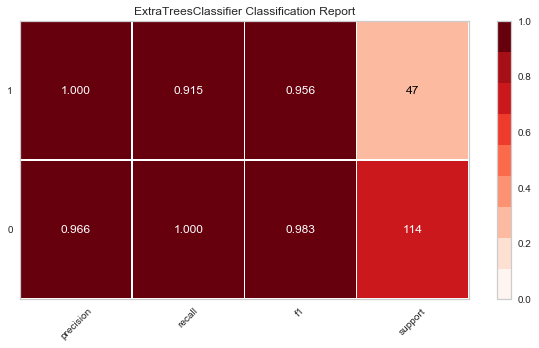

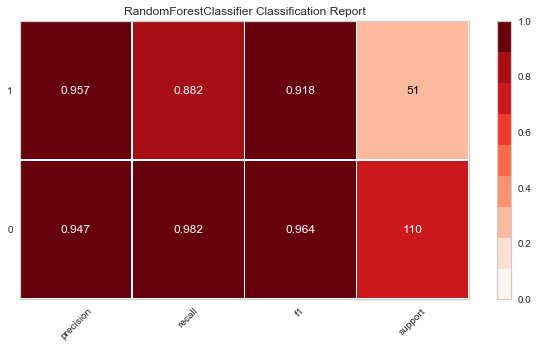

In [25]:
def visualize_model(X, y, estimator):
    """
    Test various estimators.
    """ 
    
    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, 
        classes=[0, 1], 
        cmap="Reds", 
        support=True,
        size=(600, 360)
    )
    
    X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20)
    
    visualizer.fit(X_train, y_train)  
    visualizer.score(X_test, y_test)
    visualizer.show()  

for model in models:
    visualize_model(X, y, model)

# Feature Importances

The feature engineering process involves selecting the minimum required features to produce a valid model because the more features a model contains, the more complex it is (and the more sparse the data), therefore the more sensitive the model is to errors due to variance. A common approach to eliminating features is to describe their relative importance to a model, then eliminate weak features or combinations of features and re-evalute to see if the model fairs better during cross-validation.

Many model forms describe the underlying impact of features relative to each other. In scikit-learn, Decision Tree models and ensembles of trees such as Random Forest, Gradient Boosting, and Ada Boost provide a feature_importances_ attribute when fitted. The Yellowbrick FeatureImportances visualizer utilizes this attribute to rank and plot relative importances.

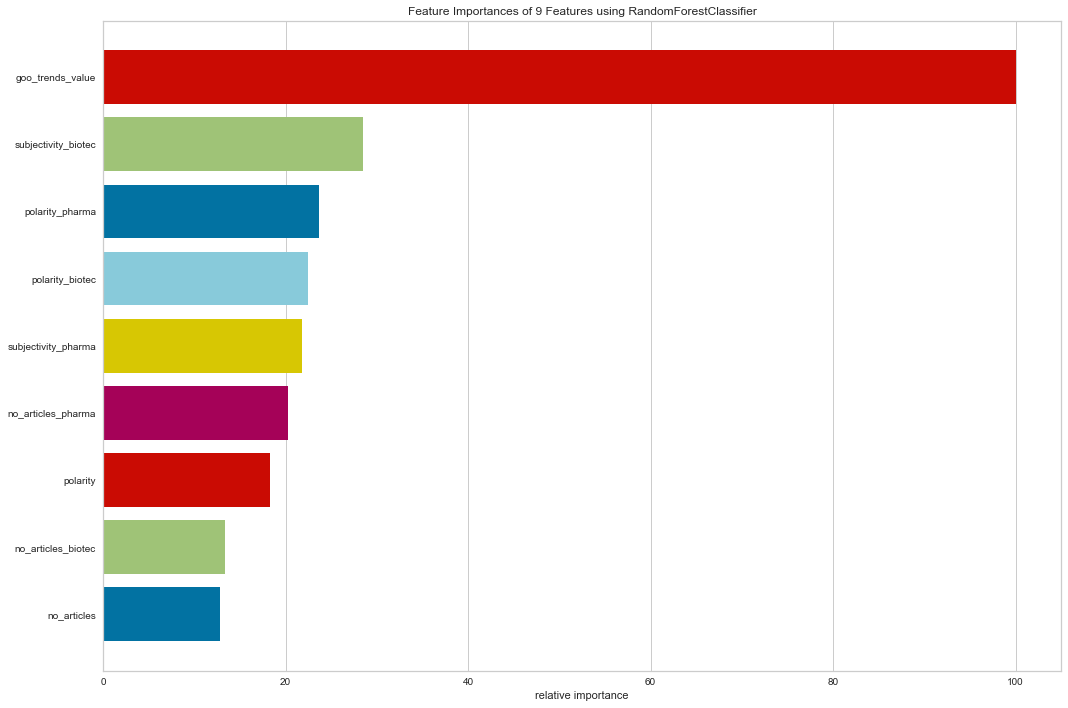

In [26]:
## look for correlations
model = RandomForestClassifier(n_estimators=10)
viz = FeatureImportances(model, labels=features, size=(1080, 720))

viz.fit(X, y)
# Note: the FeatureImportances visualizer is a model visualizer,
# not a feature visualizer, so it doesn't have a transform method!
viz.show()

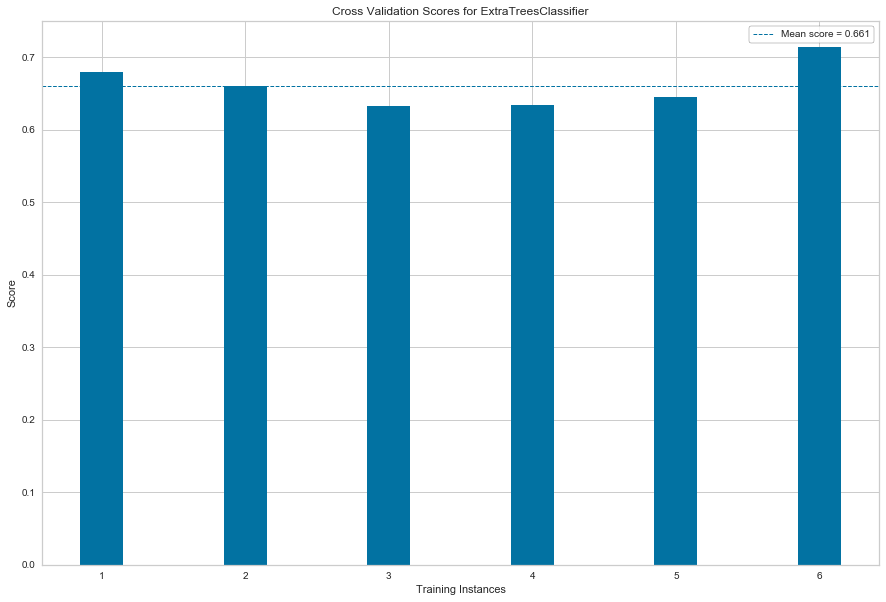

In [27]:
from sklearn.model_selection import StratifiedKFold

from yellowbrick.model_selection import CVScores

# Load the classification data set

# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=6, random_state=42)

# Instantiate the classification model and visualizer
model = ExtraTreesClassifier()
visualizer = CVScores(
    model, cv=cv, scoring='f1_weighted', size=(1080, 720)
)

visualizer.fit(X, y)
visualizer.show()

This is exciting news; however, these tools do not account for the time feature of times series, so I use a expanding window method for cross-validation!!

## Expanding window CV

This issue addresses the issue that traditional CV techniques do not take into consideration the time feature of time series and panel datasets

In [28]:
data_sd_test = data_sd

In [29]:
data_sd_test['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=int64)

Trying to solve for the issue of selecting a timely sample for CV, I create my own windows for training and testing

In [30]:
#Create train datasets for periods:
#2010-2014
data_sd_train0 = data_sd_test[data_sd_test['year'] <= 2014]

#2010-2015
data_sd_train1 = data_sd_test[data_sd_test['year'] <= 2015]

#2010-2016
data_sd_train2 = data_sd_test[data_sd_test['year'] <= 2016]

#2010-2017
data_sd_train3 = data_sd_test[data_sd_test['year'] <= 2017]

#Create test datasets for periods:
#2015-2016, first window
data_sd_test0 = data_sd_test[(data_sd_test['year'] > 2014)&(data_sd_test['year'] < 2017)]

#2016-2017, second window
data_sd_test1 = data_sd_test[(data_sd_test['year'] > 2015)&(data_sd_test['year'] < 2018)]

#2017-2018, third window
data_sd_test2 = data_sd_test[(data_sd_test['year'] > 2016)&(data_sd_test['year'] < 2019)]

#2018-2019, fourth window
data_sd_test3 = data_sd_test[(data_sd_test['year'] > 2017)]

In [31]:
#Create features and target dataframes
features = ["goo_trends_value", "polarity","no_articles","polarity_biotec","subjectivity_biotec",
            "no_articles_biotec","polarity_pharma","subjectivity_pharma","no_articles_pharma"]

#Create train datasets
X_train0 = data_sd_train0[features]
y_train0 = data_sd_train0['target']

X_train1 = data_sd_train1[features]
y_train1 = data_sd_train1['target']

X_train2 = data_sd_train2[features]
y_train2 = data_sd_train2['target']

X_train3 = data_sd_train3[features]
y_train3 = data_sd_train3['target']

#Create test datasets
X_test0 = data_sd_test0[features]
y_test0 = data_sd_test0['target']

X_test1 = data_sd_test1[features]
y_test1 = data_sd_test1['target']

X_test2 = data_sd_test2[features]
y_test2 = data_sd_test2['target']

X_test3 = data_sd_test3[features]
y_test3 = data_sd_test3['target']

# Bagging Classifier

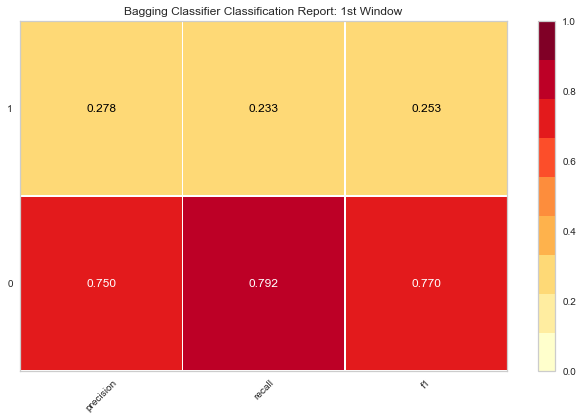

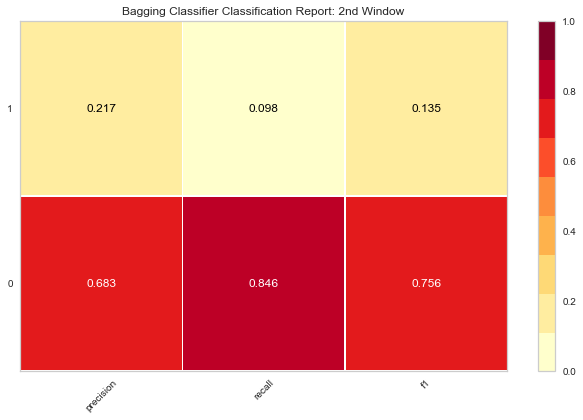

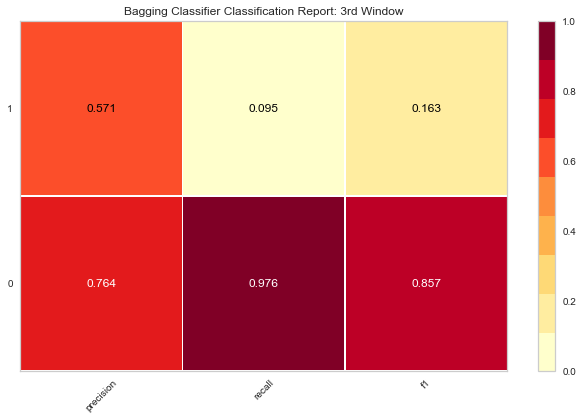

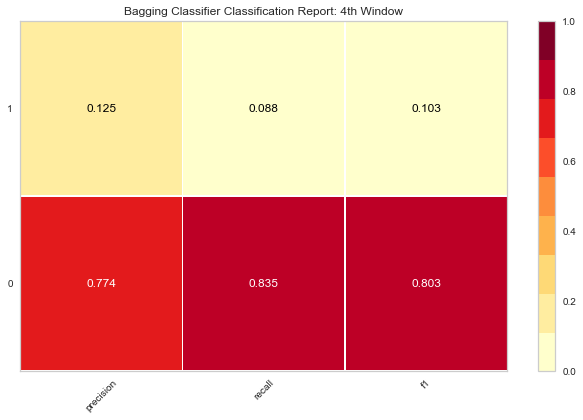

In [32]:
#for first window 
model = BaggingClassifier()
model.fit(X_train0,y_train0)
viz = ClassificationReport(model, is_fitted=True, title="Bagging Classifier Classification Report: 1st Window")
viz.score(X_test0, y_test0)
viz.show()

#For second window
model1 = BaggingClassifier()
model1.fit(X_train1,y_train1)
viz = ClassificationReport(model1, is_fitted=True, title="Bagging Classifier Classification Report: 2nd Window")
viz.score(X_test1, y_test1)
viz.show()

#For third window
model2 = BaggingClassifier()
model2.fit(X_train2,y_train2)
viz = ClassificationReport(model2, is_fitted=True, title="Bagging Classifier Classification Report: 3rd Window")
viz.score(X_test2, y_test2)
viz.show()

#For fourth window
model3 = BaggingClassifier()
model3.fit(X_train3,y_train3)
viz = ClassificationReport(model3, is_fitted=True, title="Bagging Classifier Classification Report: 4th Window")
viz.score(X_test3, y_test3)
viz.show()

# ExtraTreesClassifier

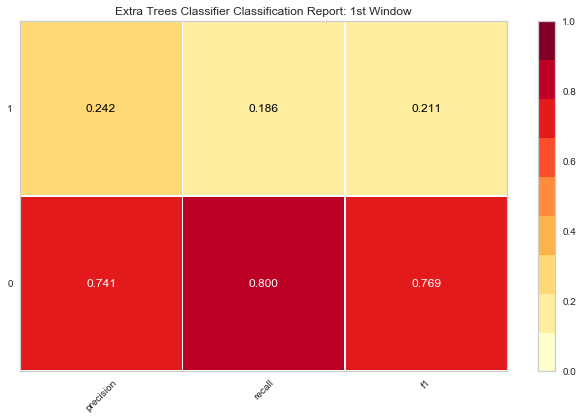

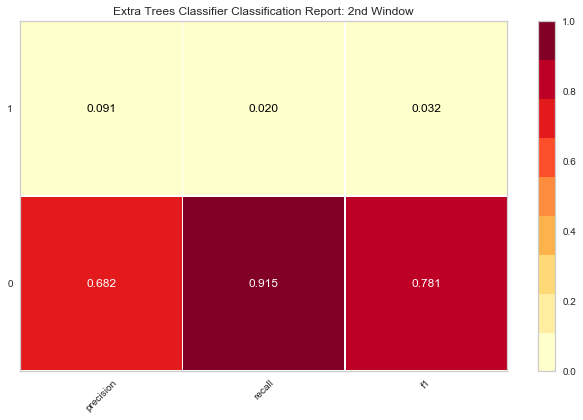

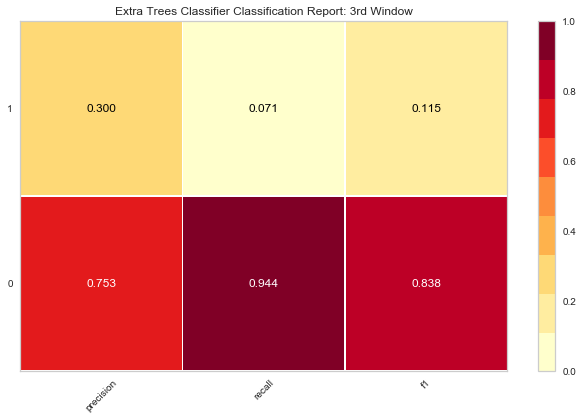

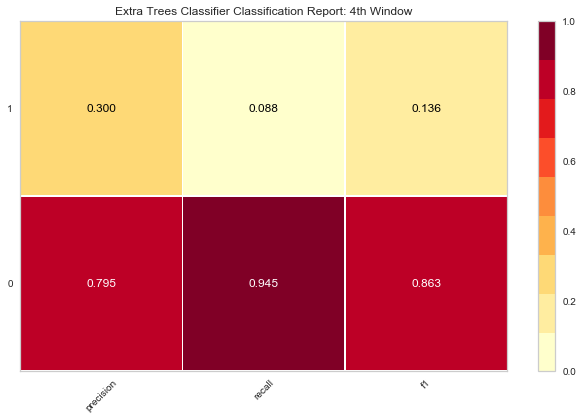

In [33]:
#for first window 
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X_train0,y_train0)
viz = ClassificationReport(model, is_fitted=True, title="Extra Trees Classifier Classification Report: 1st Window")
viz.score(X_test0, y_test0)
viz.show()

#For second window
model1 = ExtraTreesClassifier(n_estimators=100)
model1.fit(X_train1,y_train1)
viz = ClassificationReport(model1, is_fitted=True, title="Extra Trees Classifier Classification Report: 2nd Window")
viz.score(X_test1, y_test1)
viz.show()

#For third window
model2 = ExtraTreesClassifier(n_estimators=100)
model2.fit(X_train2,y_train2)
viz = ClassificationReport(model2, is_fitted=True, title="Extra Trees Classifier Classification Report: 3rd Window")
viz.score(X_test2, y_test2)
viz.show()

#For fourth window
model3 = ExtraTreesClassifier(n_estimators=100)
model3.fit(X_train3,y_train3)
viz = ClassificationReport(model3, is_fitted=True, title="Extra Trees Classifier Classification Report: 4th Window")
viz.score(X_test3, y_test3)
viz.show()

# Random Forest Classifier

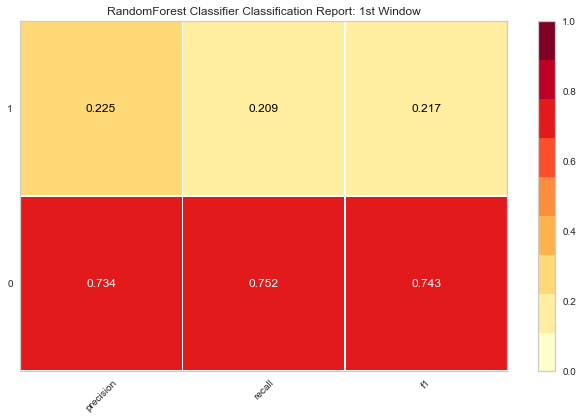

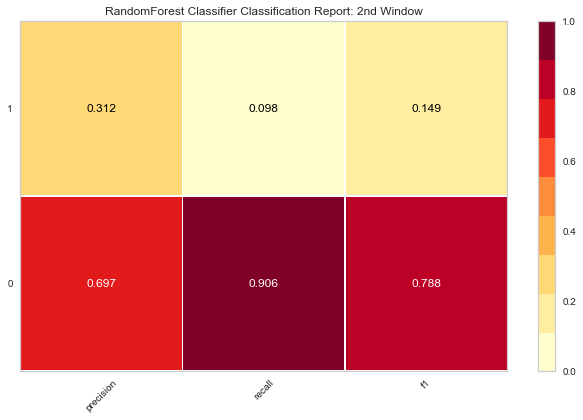

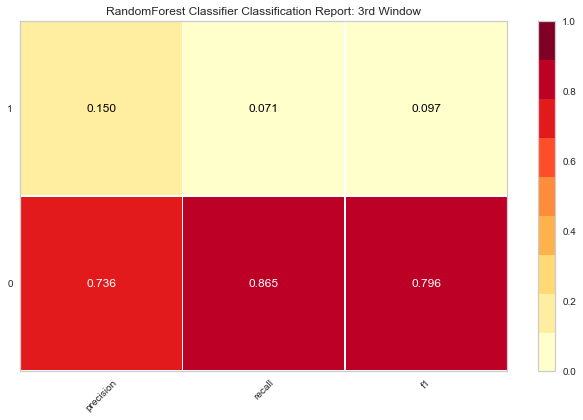

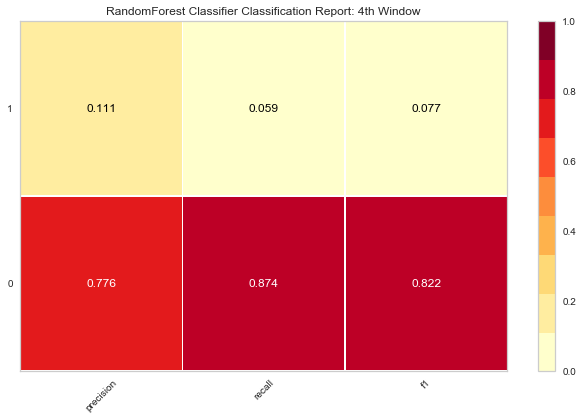

In [34]:
#for first window 
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train0,y_train0)
viz = ClassificationReport(model, is_fitted=True, title="RandomForest Classifier Classification Report: 1st Window")
viz.score(X_test0, y_test0)
viz.show()

#For second window
model1 = RandomForestClassifier(n_estimators=10)
model1.fit(X_train1,y_train1)
viz = ClassificationReport(model1, is_fitted=True, title="RandomForest Classifier Classification Report: 2nd Window")
viz.score(X_test1, y_test1)
viz.show()

#For third window
model2 = RandomForestClassifier(n_estimators=10)
model2.fit(X_train2,y_train2)
viz = ClassificationReport(model2, is_fitted=True, title="RandomForest Classifier Classification Report: 3rd Window")
viz.score(X_test2, y_test2)
viz.show()

#For fourth window
model3 = RandomForestClassifier(n_estimators=10)
model3.fit(X_train3,y_train3)
viz = ClassificationReport(model3, is_fitted=True, title="RandomForest Classifier Classification Report: 4th Window")
viz.score(X_test3, y_test3)
viz.show()

# Extended sample exercise: 2000-2020

I extend the sample from 2000 to 2020, monthly observations. I start by doing a linear analysis and predicting the average monthly residuals directly.  

In [35]:
#import base file 
#Residuals dataset
long_data = pd.read_csv('constructed\\capstone\\final_dataset_long.csv')

In [36]:
#Create datasets for each security
alxn_data = long_data[long_data['ticker'] == 'ALXN']

amgn_data = long_data[long_data['ticker'] == 'AMGN']

biib_data = long_data[long_data['ticker'] == 'BIIB']

gild_data = long_data[long_data['ticker'] == 'GILD']

incy_data = long_data[long_data['ticker'] == 'INCY']

regn_data = long_data[long_data['ticker'] == 'REGN']

vrtx_data = long_data[long_data['ticker'] == 'VRTX']

In [37]:
features = ["mthly_filing_count", "goo_trends_value", "polarity", 
            "no_articles","polarity_biotec","subjectivity_biotec","no_articles_biotec",
            "polarity_pharma","subjectivity_pharma","no_articles_pharma"]

#alxn
X_alxn = alxn_data[features]
y_alxn = alxn_data["mthly_ave_resid"]

#amgn
X_amgn = amgn_data[features]
y_amgn = amgn_data["mthly_ave_resid"]


#biib
X_biib = biib_data[features]
y_biib = biib_data["mthly_ave_resid"]

#gild
X_gild = gild_data[features]
y_gild = gild_data["mthly_ave_resid"]

#incy
X_incy = incy_data[features]
y_incy = incy_data["mthly_ave_resid"]

#rgn
X_regn = regn_data[features]
y_regn = regn_data["mthly_ave_resid"]

#vrtx
X_vrtx = vrtx_data[features]
y_vrtx = vrtx_data["mthly_ave_resid"]

In [38]:
##Elastic Net

# prepare the model with input scaling
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', ElasticNet(random_state=0))])
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())
# evaluate model
cv = KFold(n_splits=5, shuffle=True, random_state=1)
scores = cross_val_score(model, X_alxn, y_alxn, scoring='r2', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean R2: %.3f' % (s_mean))

Mean R2: 0.006


In [39]:
##Elastic Net

# prepare the model with input scaling
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', ElasticNet(random_state=0))])
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())
# evaluate model
cv = KFold(n_splits=5, shuffle=True, random_state=1)
scores = cross_val_score(model, X_amgn, y_amgn, scoring='r2', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean R2: %.3f' % (s_mean))

Mean R2: 0.013


In [40]:
##Elastic Net

# prepare the model with input scaling
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', ElasticNet(random_state=0))])
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())
# evaluate model
cv = KFold(n_splits=5, shuffle=True, random_state=1)
scores = cross_val_score(model, X_biib, y_biib, scoring='r2', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean R2: %.3f' % (s_mean))

Mean R2: 0.016


In [41]:
##Elastic Net

# prepare the model with input scaling
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', ElasticNet(random_state=0))])
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())
# evaluate model
cv = KFold(n_splits=5, shuffle=True, random_state=1)
scores = cross_val_score(model, X_gild, y_gild, scoring='r2', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean R2: %.3f' % (s_mean))

Mean R2: 0.005


In [42]:
##Elastic Net

# prepare the model with input scaling
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', ElasticNet(random_state=0))])
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())
# evaluate model
cv = KFold(n_splits=5, shuffle=True, random_state=1)
scores = cross_val_score(model, X_incy, y_incy, scoring='r2', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean R2: %.3f' % (s_mean))

Mean R2: 0.007


In [43]:
##Elastic Net

# prepare the model with input scaling
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', ElasticNet(random_state=0))])
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())
# evaluate model
cv = KFold(n_splits=5, shuffle=True, random_state=1)
scores = cross_val_score(model, X_regn, y_regn, scoring='r2', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean R2: %.3f' % (s_mean))

Mean R2: 0.021


# Time series - binary classification using extended sample

In [44]:
ts_data = long_data

In [45]:
#Generate boundaries for each ticker
group_agg_l = ts_data.groupby(["ticker"]).agg({"mthly_ave_resid" : ["mean", "std"]})
group_agg_l = group_agg_l.reset_index()
group_agg_l.columns = group_agg_l.columns.map(''.join)

#Rename columns 
group_agg_l = group_agg_l.rename(columns={'mthly_ave_residmean':'resid_mean',
                                      'mthly_ave_residstd':'resid_std'
                                                     })

group_agg_l['interval_superior'] = group_agg_l['resid_mean'] + group_agg_l['resid_std']
group_agg_l['interval_inferior'] = group_agg_l['resid_mean'] - group_agg_l['resid_std']

In [46]:
group_agg_l

,ticker,resid_mean,resid_std,interval_superior,interval_inferior
0,ALXN,0.000101,0.006034,0.006136,-0.005933
1,AMGN,0.000021,0.003249,0.003270,-0.003228
2,BIIB,0.000155,0.005666,0.005820,-0.005511
3,GILD,0.000069,0.003879,0.003948,-0.003810
4,INCY,0.000127,0.006706,0.006832,-0.006579
5,REGN,-0.000054,0.007488,0.007434,-0.007542
6,VRTX,-0.000040,0.006414,0.006375,-0.006454


In [47]:
ts_data['target']= 0

ts_data.loc[(ts_data['mthly_ave_resid'] >= group_agg_l.iloc[0]['interval_superior']) & (ts_data['ticker'] == 'ALXN'), 'target'] = 1
ts_data.loc[(ts_data['mthly_ave_resid'] <= group_agg_l.iloc[0]['interval_inferior']) & (ts_data['ticker'] == 'ALXN'), 'target'] = 1

ts_data.loc[(ts_data['mthly_ave_resid'] >= group_agg_l.iloc[1]['interval_superior']) & (ts_data['ticker'] == 'AMGN'), 'target'] = 1
ts_data.loc[(ts_data['mthly_ave_resid'] <= group_agg_l.iloc[1]['interval_inferior']) & (ts_data['ticker'] == 'AMGN'), 'target'] = 1

ts_data.loc[(ts_data['mthly_ave_resid'] >= group_agg_l.iloc[2]['interval_superior']) & (ts_data['ticker'] == 'BIIB'), 'target'] = 1
ts_data.loc[(ts_data['mthly_ave_resid'] <= group_agg_l.iloc[2]['interval_inferior']) & (ts_data['ticker'] == 'BIIB'), 'target'] = 1

ts_data.loc[(ts_data['mthly_ave_resid'] >= group_agg_l.iloc[3]['interval_superior']) & (ts_data['ticker'] == 'GILD'), 'target'] = 1
ts_data.loc[(ts_data['mthly_ave_resid'] <= group_agg_l.iloc[3]['interval_inferior']) & (ts_data['ticker'] == 'GILD'), 'target'] = 1

ts_data.loc[(ts_data['mthly_ave_resid'] >= group_agg_l.iloc[4]['interval_superior']) & (ts_data['ticker'] == 'INCY'), 'target'] = 1
ts_data.loc[(ts_data['mthly_ave_resid'] <= group_agg_l.iloc[4]['interval_inferior']) & (ts_data['ticker'] == 'INCY'), 'target'] = 1

ts_data.loc[(ts_data['mthly_ave_resid'] >= group_agg_l.iloc[5]['interval_superior']) & (ts_data['ticker'] == 'REGN'), 'target'] = 1
ts_data.loc[(ts_data['mthly_ave_resid'] <= group_agg_l.iloc[5]['interval_inferior']) & (ts_data['ticker'] == 'REGN'), 'target'] = 1

ts_data.loc[(ts_data['mthly_ave_resid'] >= group_agg_l.iloc[6]['interval_superior']) & (ts_data['ticker'] == 'VRTX'), 'target'] = 1
ts_data.loc[(ts_data['mthly_ave_resid'] <= group_agg_l.iloc[6]['interval_inferior']) & (ts_data['ticker'] == 'VRTX'), 'target'] = 1


In [48]:
#Create features and target dataframes

features = ["goo_trends_value", "polarity","no_articles","polarity_biotec","subjectivity_biotec",
            "no_articles_biotec","polarity_pharma","subjectivity_pharma","no_articles_pharma"]

X_ts = ts_data[features]
y_ts = ts_data["target"]  

In [49]:
#Try all models

models = [
    SVC(gamma='auto'), LinearSVC(), 
    SGDClassifier(max_iter=100, tol=1e-3), KNeighborsClassifier(), 
    LogisticRegression(solver='lbfgs'), LogisticRegressionCV(cv=3), 
    BaggingClassifier(), ExtraTreesClassifier(n_estimators=100), 
    RandomForestClassifier(n_estimators=10), GaussianNB()
]

for model in models:
    score_model(X_ts, y_ts, model)

SVC: 0.4812834224598931
LinearSVC: 0.0
SGDClassifier: 0.388560157790927
KNeighborsClassifier: 0.37613019891500904
LogisticRegression: 0.019704433497536946
LogisticRegressionCV: 0.019704433497536946
BaggingClassifier: 0.8205128205128205
ExtraTreesClassifier: 0.8667563930013458
RandomForestClassifier: 0.814404432132964
GaussianNB: 0.2823920265780731


In [50]:
data_ts = ts_data

# Expanding Windows CV

In [51]:
#Create train datasets for periods:
#2000-2011
data_ts_train0 = data_ts[data_ts['year'] <= 2011]

#2000-2012
data_ts_train1 = data_ts[data_ts['year'] <= 2012]

#2000-2013
data_ts_train2 = data_ts[data_ts['year'] <= 2013]

#2000-2014
data_ts_train3 = data_ts[data_ts['year'] <= 2014]

#2000-2015
data_ts_train4 = data_ts[data_ts['year'] <= 2015]

#2010-2016
data_ts_train5 = data_ts[data_ts['year'] <= 2016]

#2010-2017
data_ts_train6 = data_ts[data_ts['year'] <= 2017]

#Create test datasets for periods:

#2012-2013, first window
data_ts_test0 = data_ts[(data_ts['year'] > 2011)&(data_ts['year'] < 2014)]

#2013-2014, second window
data_ts_test1 = data_ts[(data_ts['year'] > 2012)&(data_ts['year'] < 2015)]

#2014-2015, third window
data_ts_test2 = data_ts[(data_ts['year'] > 2013)&(data_ts['year'] < 2016)]

#2015-2016, fourth window
data_ts_test3 = data_ts[(data_ts['year'] > 2014)&(data_ts['year'] < 2017)]

#2016-2017, fifth window
data_ts_test4 = data_ts[(data_ts['year'] > 2015)&(data_ts['year'] < 2018)]

#2017-2018, sixth window
data_ts_test5 = data_ts[(data_ts['year'] > 2016)&(data_ts['year'] < 2019)]

#2018-2019, seventh window
data_ts_test6 = data_ts[(data_ts['year'] > 2017)]

In [52]:
#Create features and target datasets
features = ["goo_trends_value", "polarity","no_articles","polarity_biotec","subjectivity_biotec",
            "no_articles_biotec","polarity_pharma","subjectivity_pharma","no_articles_pharma"]

#Create train datasets
X_train0 = data_ts_train0[features]
y_train0 = data_ts_train0['target']

X_train1 = data_ts_train1[features]
y_train1 = data_ts_train1['target']

X_train2 = data_ts_train2[features]
y_train2 = data_ts_train2['target']

X_train3 = data_ts_train3[features]
y_train3 = data_ts_train3['target']

X_train4 = data_ts_train4[features]
y_train4 = data_ts_train4['target']

X_train5 = data_ts_train5[features]
y_train5 = data_ts_train5['target']

X_train6 = data_ts_train6[features]
y_train6 = data_ts_train6['target']

#Create test datasets
X_test0 = data_ts_test0[features]
y_test0 = data_ts_test0['target']

X_test1 = data_ts_test1[features]
y_test1 = data_ts_test1['target']

X_test2 = data_ts_test2[features]
y_test2 = data_ts_test2['target']

X_test3 = data_ts_test3[features]
y_test3 = data_ts_test3['target']

X_test4 = data_ts_test4[features]
y_test4 = data_ts_test4['target']

X_test5 = data_ts_test5[features]
y_test5 = data_ts_test5['target']

X_test6 = data_ts_test6[features]
y_test6 = data_ts_test6['target']

# Bagging Classifier

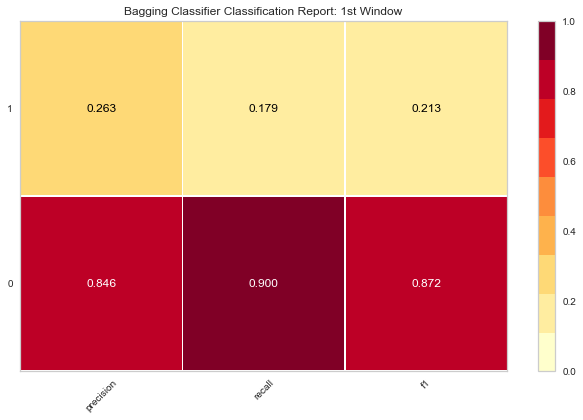

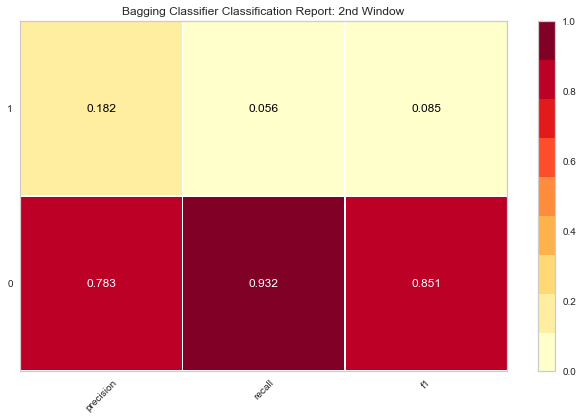

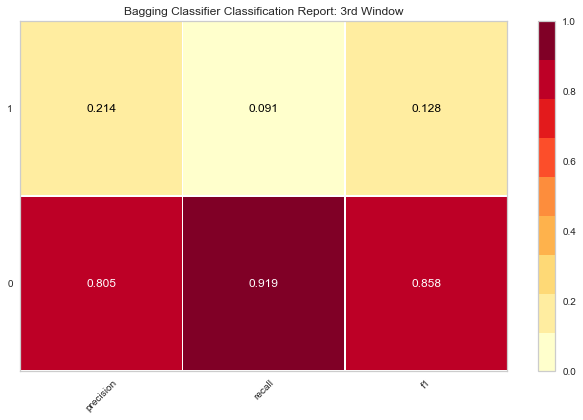

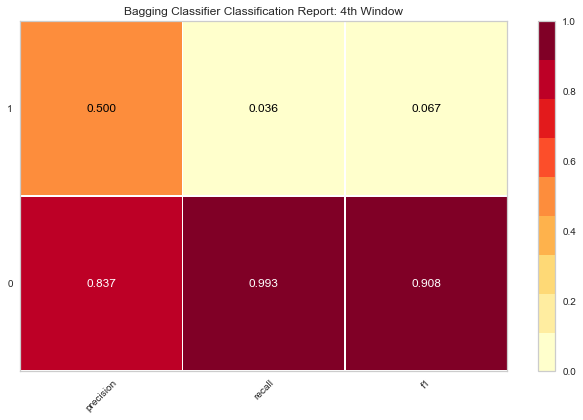

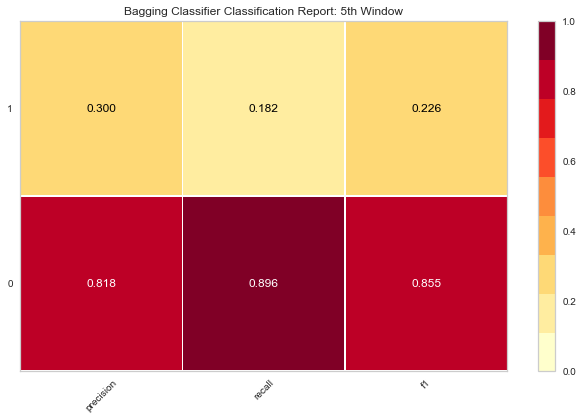

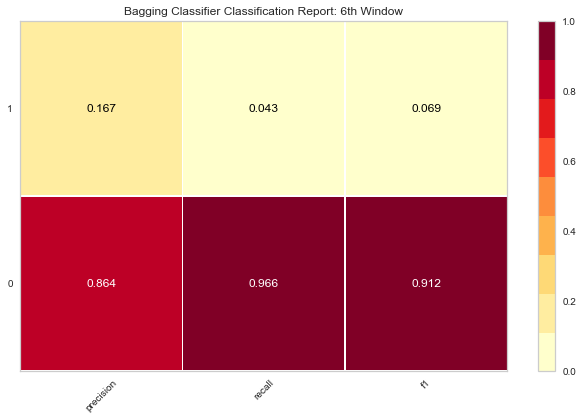

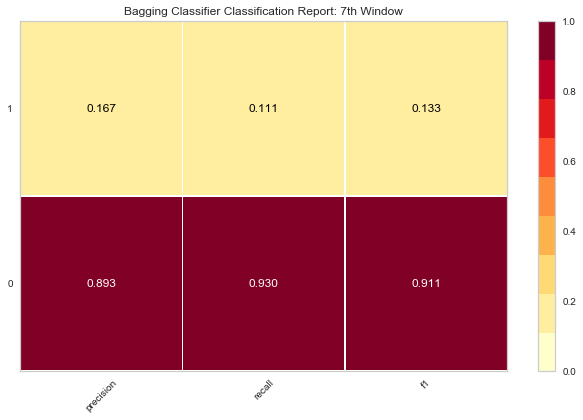

In [53]:
#for first window 
model = BaggingClassifier()
model.fit(X_train0,y_train0)
viz = ClassificationReport(model, is_fitted=True, title="Bagging Classifier Classification Report: 1st Window")
viz.score(X_test0, y_test0)
viz.show()

#For second window
model1 = BaggingClassifier()
model1.fit(X_train1,y_train1)
viz = ClassificationReport(model1, is_fitted=True, title="Bagging Classifier Classification Report: 2nd Window")
viz.score(X_test1, y_test1)
viz.show()

#For third window
model2 = BaggingClassifier()
model2.fit(X_train2,y_train2)
viz = ClassificationReport(model2, is_fitted=True, title="Bagging Classifier Classification Report: 3rd Window")
viz.score(X_test2, y_test2)
viz.show()

#For fourth window
model3 = BaggingClassifier()
model3.fit(X_train3,y_train3)
viz = ClassificationReport(model3, is_fitted=True, title="Bagging Classifier Classification Report: 4th Window")
viz.score(X_test3, y_test3)
viz.show()

#For fifth window
model4 = BaggingClassifier()
model4.fit(X_train4,y_train4)
viz = ClassificationReport(model4, is_fitted=True, title="Bagging Classifier Classification Report: 5th Window")
viz.score(X_test4, y_test4)
viz.show()

#For sixth window
model5 = BaggingClassifier()
model5.fit(X_train5,y_train5)
viz = ClassificationReport(model5, is_fitted=True, title="Bagging Classifier Classification Report: 6th Window")
viz.score(X_test5, y_test5)
viz.show()

#For seventh window
model6 = BaggingClassifier()
model6.fit(X_train6,y_train6)
viz = ClassificationReport(model6, is_fitted=True, title="Bagging Classifier Classification Report: 7th Window")
viz.score(X_test6, y_test6)
viz.show()

# ExtraTreesClassifier

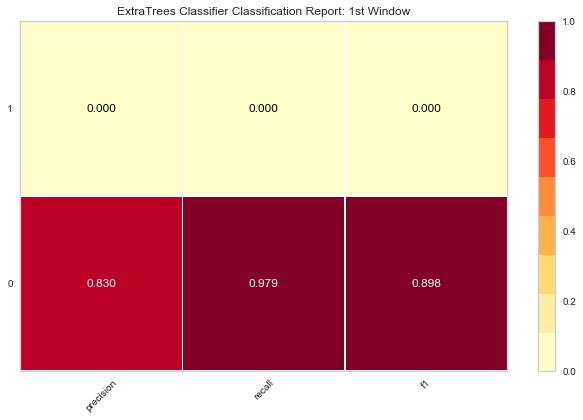

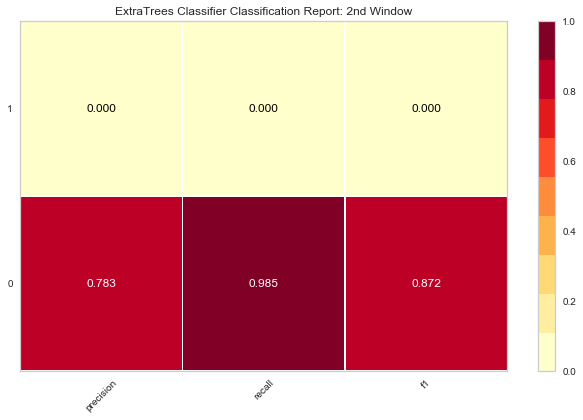

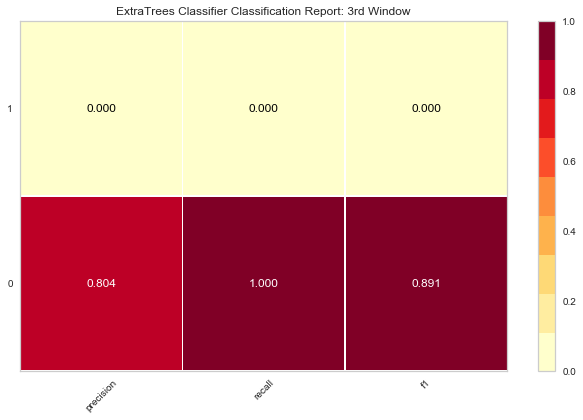

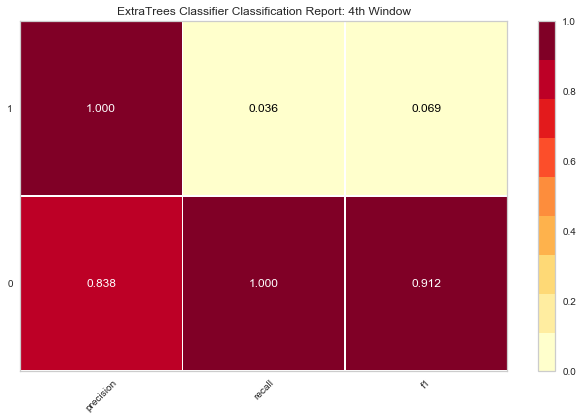

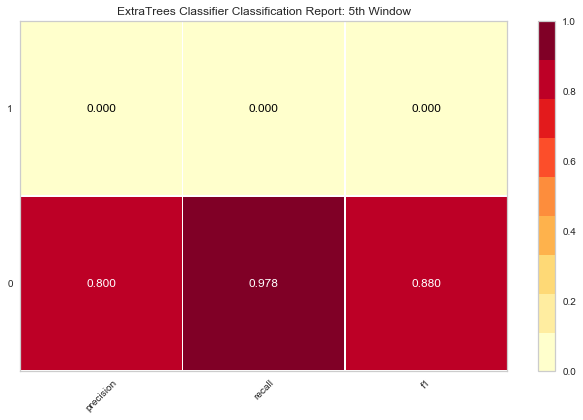

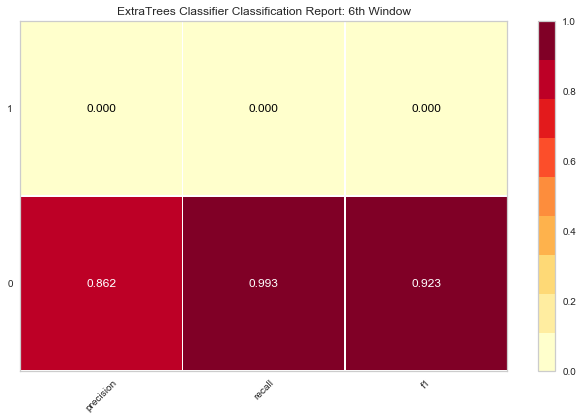

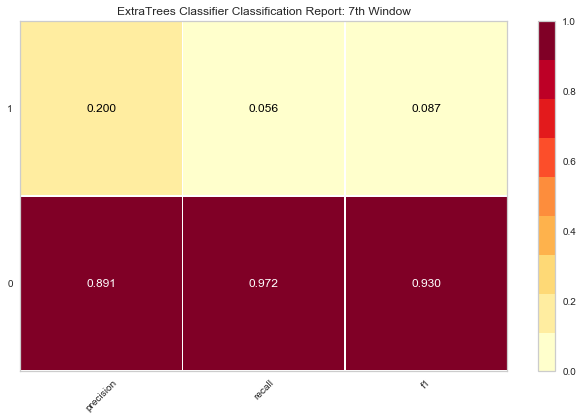

In [54]:
#for first window 
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X_train0,y_train0)
viz = ClassificationReport(model, is_fitted=True, title="ExtraTrees Classifier Classification Report: 1st Window")
viz.score(X_test0, y_test0)
viz.show()

#For second window
model1 = ExtraTreesClassifier(n_estimators=100)
model1.fit(X_train1,y_train1)
viz = ClassificationReport(model1, is_fitted=True, title="ExtraTrees Classifier Classification Report: 2nd Window")
viz.score(X_test1, y_test1)
viz.show()

#For third window
model2 = ExtraTreesClassifier(n_estimators=100)
model2.fit(X_train2,y_train2)
viz = ClassificationReport(model2, is_fitted=True, title="ExtraTrees Classifier Classification Report: 3rd Window")
viz.score(X_test2, y_test2)
viz.show()

#For fourth window
model3 = ExtraTreesClassifier(n_estimators=100)
model3.fit(X_train3,y_train3)
viz = ClassificationReport(model3, is_fitted=True, title="ExtraTrees Classifier Classification Report: 4th Window")
viz.score(X_test3, y_test3)
viz.show()

#For fifth window
model4 = ExtraTreesClassifier(n_estimators=100)
model4.fit(X_train4,y_train4)
viz = ClassificationReport(model4, is_fitted=True, title="ExtraTrees Classifier Classification Report: 5th Window")
viz.score(X_test4, y_test4)
viz.show()

#For sixth window
model5 = ExtraTreesClassifier(n_estimators=100)
model5.fit(X_train5,y_train5)
viz = ClassificationReport(model5, is_fitted=True, title="ExtraTrees Classifier Classification Report: 6th Window")
viz.score(X_test5, y_test5)
viz.show()

#For seventh window
model6 = ExtraTreesClassifier(n_estimators=100)
model6.fit(X_train6,y_train6)
viz = ClassificationReport(model6, is_fitted=True, title="ExtraTrees Classifier Classification Report: 7th Window")
viz.score(X_test6, y_test6)
viz.show()

# Random Forest Classifier

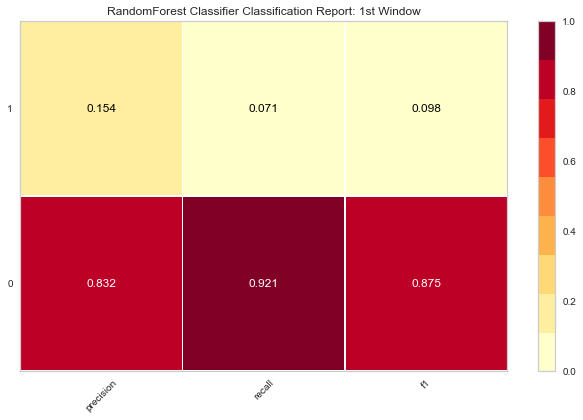

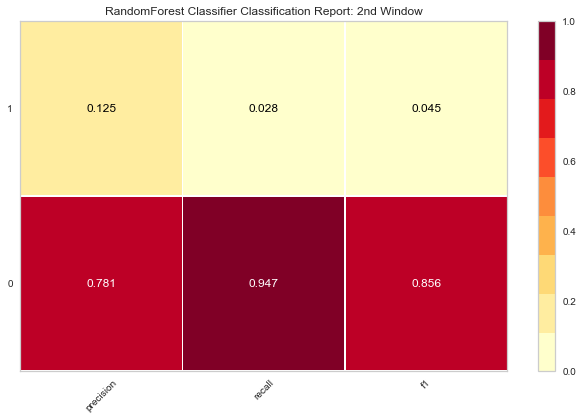

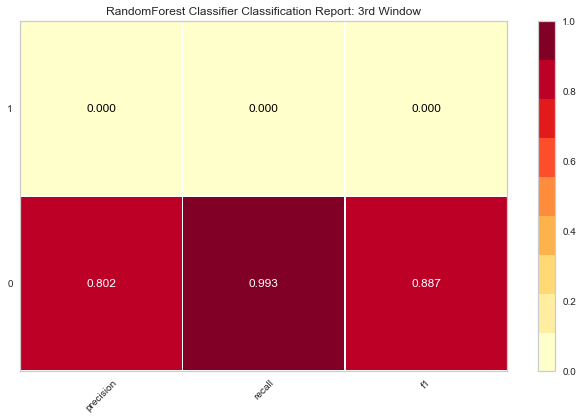

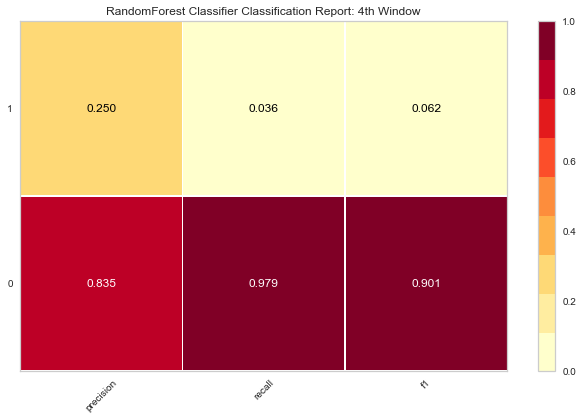

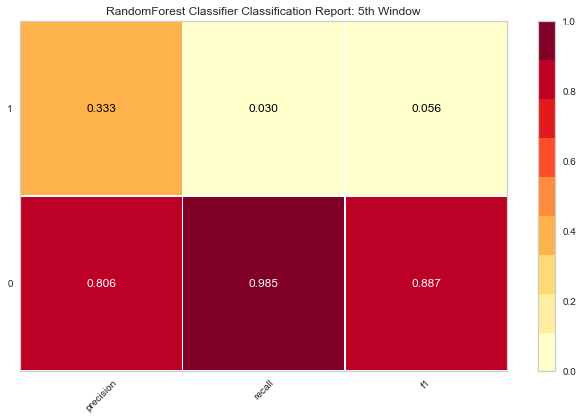

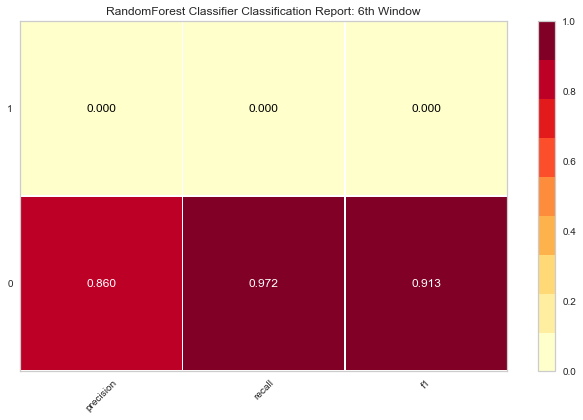

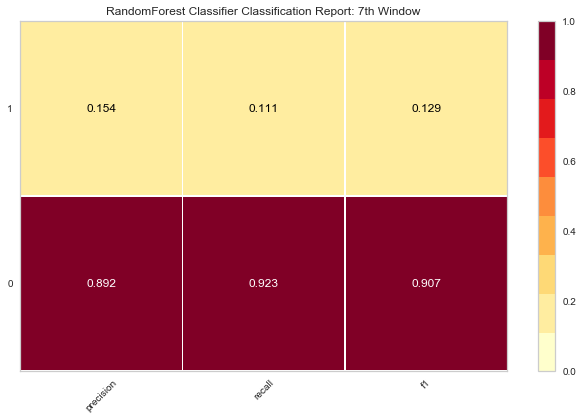

In [55]:
#for first window 
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train0,y_train0)
viz = ClassificationReport(model, is_fitted=True, title="RandomForest Classifier Classification Report: 1st Window")
viz.score(X_test0, y_test0)
viz.show()

#For second window
model1 = RandomForestClassifier(n_estimators=10)
model1.fit(X_train1,y_train1)
viz = ClassificationReport(model1, is_fitted=True, title="RandomForest Classifier Classification Report: 2nd Window")
viz.score(X_test1, y_test1)
viz.show()

#For third window
model2 = RandomForestClassifier(n_estimators=10)
model2.fit(X_train2,y_train2)
viz = ClassificationReport(model2, is_fitted=True, title="RandomForest Classifier Classification Report: 3rd Window")
viz.score(X_test2, y_test2)
viz.show()

#For fourth window
model3 = RandomForestClassifier(n_estimators=10)
model3.fit(X_train3,y_train3)
viz = ClassificationReport(model3, is_fitted=True, title="RandomForest Classifier Classification Report: 4th Window")
viz.score(X_test3, y_test3)
viz.show()

#For fifth window
model4 = RandomForestClassifier(n_estimators=10)
model4.fit(X_train4,y_train4)
viz = ClassificationReport(model4, is_fitted=True, title="RandomForest Classifier Classification Report: 5th Window")
viz.score(X_test4, y_test4)
viz.show()

#For sixth window
model5 = RandomForestClassifier(n_estimators=10)
model5.fit(X_train5,y_train5)
viz = ClassificationReport(model5, is_fitted=True, title="RandomForest Classifier Classification Report: 6th Window")
viz.score(X_test5, y_test5)
viz.show()

#For seventh window
model6 = RandomForestClassifier(n_estimators=10)
model6.fit(X_train6,y_train6)
viz = ClassificationReport(model6, is_fitted=True, title="RandomForest Classifier Classification Report: 7th Window")
viz.score(X_test6, y_test6)
viz.show()

# Create time series datasets for analysis per stock

In [56]:
#Create datasets for each security
alxn_data = ts_data[ts_data['ticker'] == 'ALXN']
amgn_data = ts_data[ts_data['ticker'] == 'AMGN']
biib_data = ts_data[ts_data['ticker'] == 'BIIB']
gild_data = ts_data[ts_data['ticker'] == 'GILD']
incy_data = ts_data[ts_data['ticker'] == 'INCY']
regn_data = ts_data[ts_data['ticker'] == 'REGN']
vrtx_data = ts_data[ts_data['ticker'] == 'VRTX']

#Create features and target dataframes
features = ["goo_trends_value", "polarity","no_articles","polarity_biotec","subjectivity_biotec",
            "no_articles_biotec","polarity_pharma","subjectivity_pharma","no_articles_pharma"]

# ALXN

In [57]:
#Create train and test dataset
#2010-2017
alxn_train6 = alxn_data[alxn_data['year'] <= 2017]

#2018-2019, seventh window
alxn_test6 = alxn_data[(alxn_data['year'] > 2017)]


#create features and target dataset
X_train_alxn = alxn_train6[features]
y_train_alxn = alxn_train6["target"]

X_test_alxn = alxn_test6[features]
y_test_alxn = alxn_test6["target"]

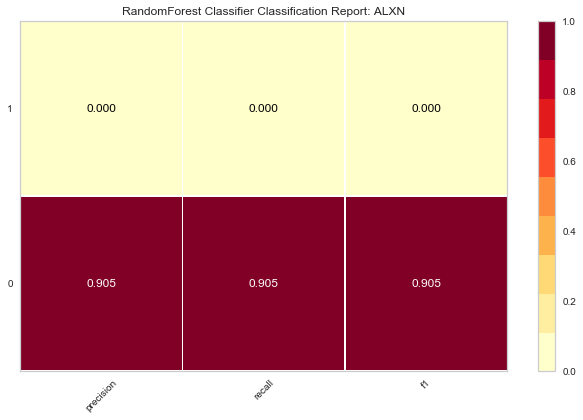

In [58]:
#for sixth window only
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train_alxn,y_train_alxn)
viz = ClassificationReport(model, is_fitted=True, title="RandomForest Classifier Classification Report: ALXN")
viz.score(X_test_alxn, y_test_alxn)
viz.show()

# AMGN

In [59]:
#Create train and test dataset
#2010-2017
amgn_train6 = amgn_data[amgn_data['year'] <= 2017]

#2018-2019, seventh window
amgn_test6 = amgn_data[(amgn_data['year'] > 2017)]


#create features and target dataset
X_train_amgn = amgn_train6[features]
y_train_amgn = amgn_train6["target"]

X_test_amgn = amgn_test6[features]
y_test_amgn = amgn_test6["target"]

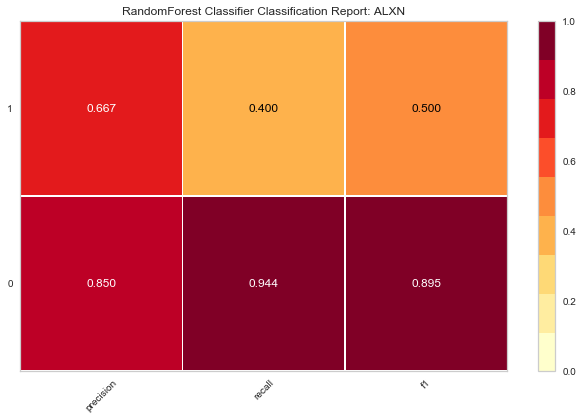

In [60]:
#for sixth window only
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train_amgn,y_train_amgn)
viz = ClassificationReport(model, is_fitted=True, title="RandomForest Classifier Classification Report: ALXN")
viz.score(X_test_amgn, y_test_amgn)
viz.show()

# BIIB

In [61]:
#Create train and test dataset
#2010-2017
biib_train6 = biib_data[biib_data['year'] <= 2017]

#2018-2019, seventh window
biib_test6 = biib_data[(biib_data['year'] > 2017)]


#create features and target dataset
X_train_biib = biib_train6[features]
y_train_biib = biib_train6["target"]

X_test_biib = biib_test6[features]
y_test_biib = biib_test6["target"]

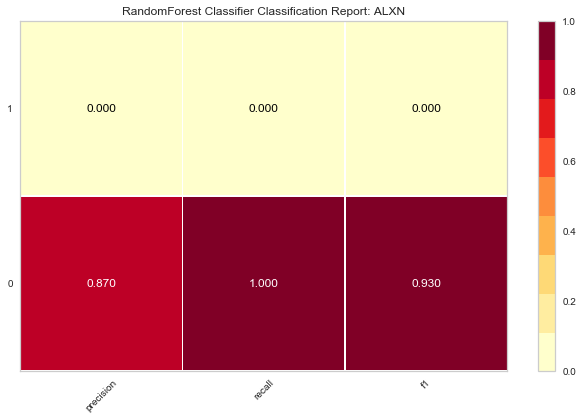

In [62]:
#for sixth window only
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train_biib,y_train_biib)
viz = ClassificationReport(model, is_fitted=True, title="RandomForest Classifier Classification Report: ALXN")
viz.score(X_test_biib, y_test_biib)
viz.show()

# GILD

In [63]:
#Create train and test dataset
#2010-2017
gild_train6 = gild_data[gild_data['year'] <= 2017]

#2018-2019, seventh window
gild_test6 = gild_data[(gild_data['year'] > 2017)]


#create features and target dataset
X_train_gild = gild_train6[features]
y_train_gild = gild_train6["target"]

X_test_gild = gild_test6[features]
y_test_gild = gild_test6["target"]

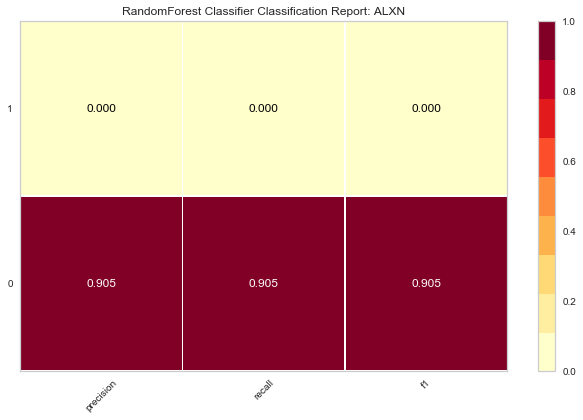

In [64]:
#for sixth window only
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train_gild,y_train_gild)
viz = ClassificationReport(model, is_fitted=True, title="RandomForest Classifier Classification Report: ALXN")
viz.score(X_test_gild, y_test_gild)
viz.show()

# INCY

In [65]:
#Create train and test dataset
#2010-2017
incy_train6 = incy_data[incy_data['year'] <= 2017]

#2018-2019, seventh window
incy_test6 = incy_data[(incy_data['year'] > 2017)]


#create features and target dataset
X_train_incy = incy_train6[features]
y_train_incy = incy_train6["target"]

X_test_incy = incy_test6[features]
y_test_incy = incy_test6["target"]

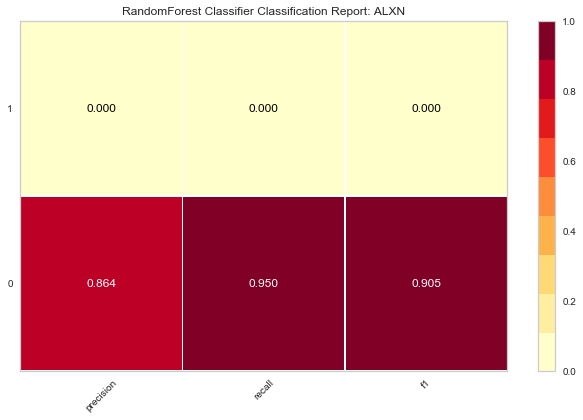

In [66]:
#for sixth window only
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train_incy,y_train_incy)
viz = ClassificationReport(model, is_fitted=True, title="RandomForest Classifier Classification Report: ALXN")
viz.score(X_test_incy, y_test_incy)
viz.show()

# REGN

In [67]:
#Create train and test dataset
#2010-2017
regn_train6 = regn_data[regn_data['year'] <= 2017]

#2018-2019, seventh window
regn_test6 = regn_data[(regn_data['year'] > 2017)]


#create features and target dataset
X_train_regn = regn_train6[features]
y_train_regn = regn_train6["target"]

X_test_regn = regn_test6[features]
y_test_regn = regn_test6["target"]

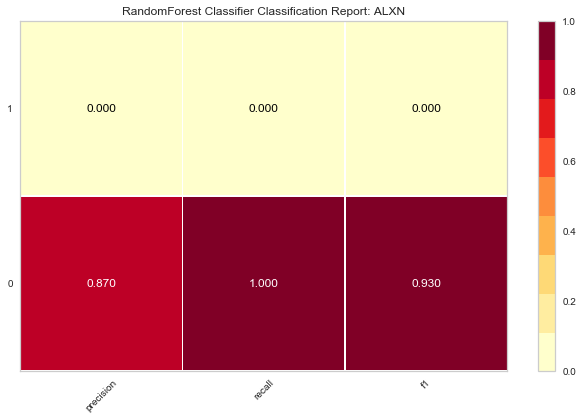

In [68]:
#for sixth window only
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train_regn,y_train_regn)
viz = ClassificationReport(model, is_fitted=True, title="RandomForest Classifier Classification Report: ALXN")
viz.score(X_test_regn, y_test_regn)
viz.show()

# VRTX

In [69]:
#Create train and test dataset
#2010-2017
vrtx_train6 = vrtx_data[vrtx_data['year'] <= 2017]

#2018-2019, seventh window
vrtx_test6 = vrtx_data[(vrtx_data['year'] > 2017)]


#create features and target dataset
X_train_vrtx = vrtx_train6[features]
y_train_vrtx = vrtx_train6["target"]

X_test_vrtx = vrtx_test6[features]
y_test_vrtx = vrtx_test6["target"]

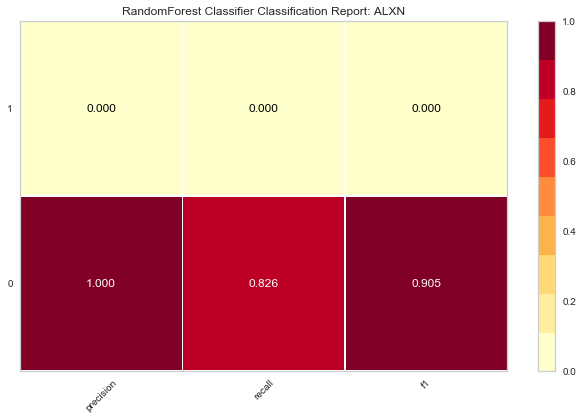

In [70]:
#for sixth window only
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train_vrtx,y_train_vrtx)
viz = ClassificationReport(model, is_fitted=True, title="RandomForest Classifier Classification Report: ALXN")
viz.score(X_test_vrtx, y_test_vrtx)
viz.show()